In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d kshitij192/cars-image-dataset

cars-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cars-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Cars Dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Cars Dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


In [ ]:
class_names = train_ds.class_names  # Using train_ds because class_names should be the same for train and validation

# Create a dictionary mapping class names to indices
class_indices = {class_name: index for index, class_name in enumerate(class_names)}

# If you need a list of class names
class_names_list = list(class_indices.keys())

class_names_list

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 246016)            0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
105/105 [==============================] - 167s 2s/step - loss: 1.9414 - accuracy: 0.3499 - val_loss: 1.4902 - val_accuracy: 0.4760
Epoch 2/5
105/105 [==============================] - 158s 2s/step - loss: 1.1114 - accuracy: 0.6169 - val_loss: 1.1871 - val_accuracy: 0.6261
Epoch 3/5
105/105 [==============================] - 163s 2s/step - loss: 0.5213 - accuracy: 0.8320 - val_loss: 1.2059 - val_accuracy: 0.6212
Epoch 4/5
105/105 [==============================] - 163s 2s/step - loss: 0.2513 - accuracy: 0.9209 - val_loss: 1.3241 - val_accuracy: 0.6408
Epoch 5/5
105/105 [==============================] - 161s 2s/step - loss: 0.1432 - accuracy: 0.9603 - val_loss: 1.4786 - val_accuracy: 0.6347


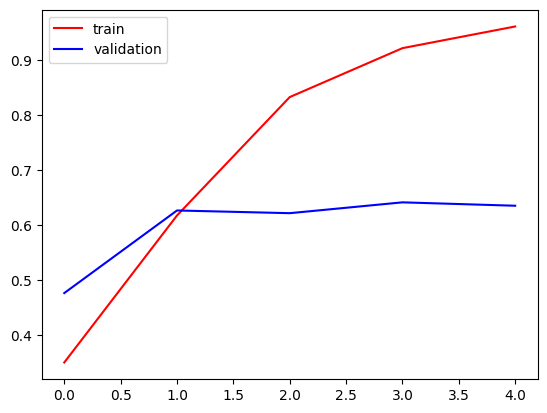

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

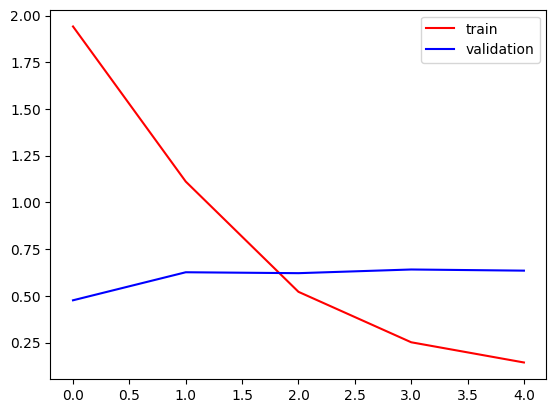

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


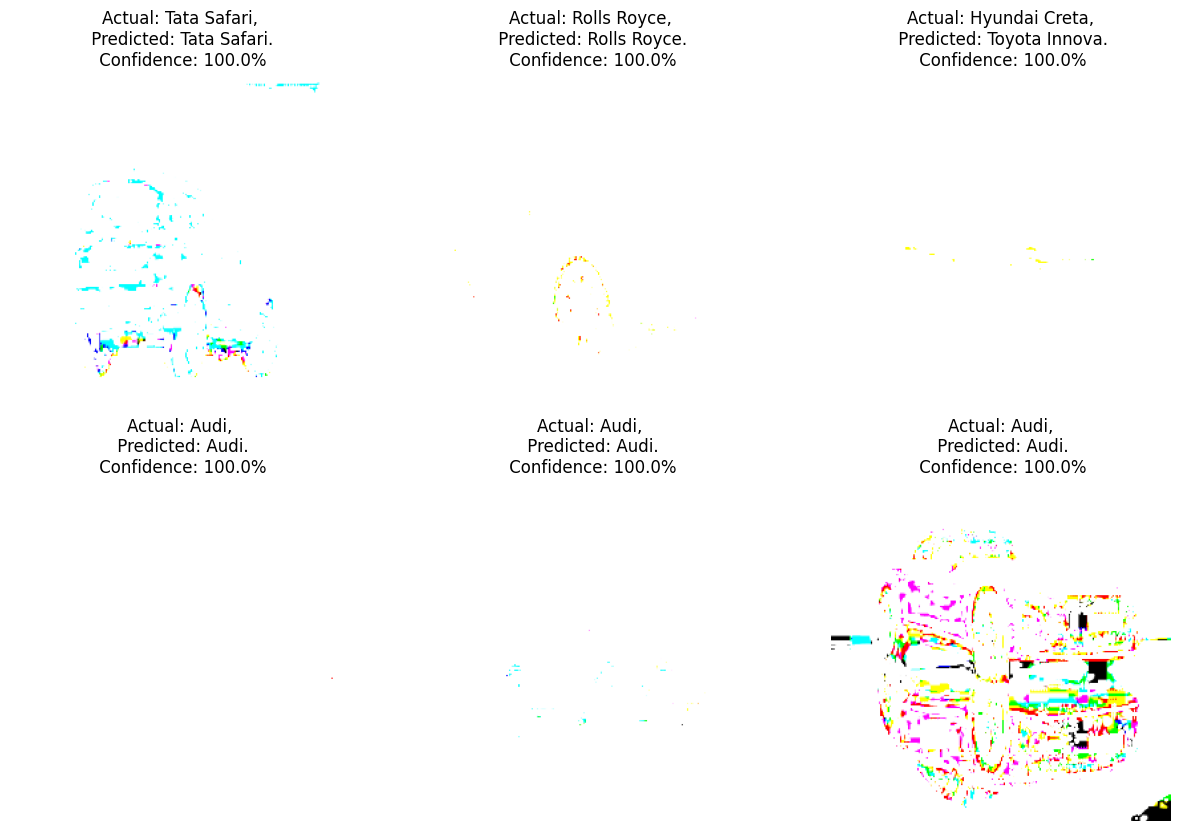

In [ ]:
import numpy as np


plt.figure(figsize=(15, 15))
for images, labels in validation_ds:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names_list[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

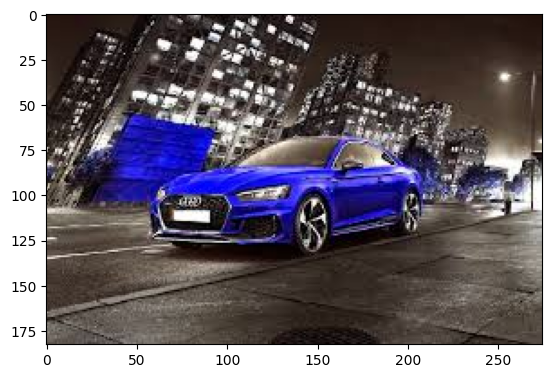

In [ ]:
import cv2
test_img = cv2.imread('/content/Cars Dataset/test/Audi/1000.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(183, 275, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
Y_pred = model.predict(test_input)

1/1 [==============================] - 0s 54ms/step


In [ ]:
Y_pred_labels = np.argmax(Y_pred)
print(Y_pred_labels)

0


In [ ]:
class_names_list[0]

'Audi'